Nesse notebook vou preparar os dados de forecast de volume para o mês de setembro/2020, recebido da Carolina Crispim.

Esses valores serão usados por alguns modelos como input para o forecast da quantidade de remessas para o mês de setembro.

In [27]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Importando os dados
df = pd.read_csv("volume_setembro.csv", sep=';')
df = df.rename(columns={"DATA": 'DataEntrega'})

#transformando num df de time series
df['DataEntrega'] = pd.to_datetime(df['DataEntrega'], dayfirst=True)
df = df.set_index('DataEntrega')

#Imprime o dataframe
df.head()

,CLUSTER,Volume
DataEntrega,,
2020-09-01,A,6989.510406
2020-09-01,B,5198.348091
2020-09-01,C,1850.169551
2020-09-01,D,5104.737409
2020-09-01,E,35653.916310


In [38]:
#### Separando os dados por cluster

# Criar uma lista de dfs. Cada df carrega as informações de um único cluster
dfs = []
for cluster in df.CLUSTER.unique():
    dfs.append(df[df.CLUSTER == cluster].rename(columns={'Volume': f'Volume_{cluster}'}).drop('CLUSTER', axis=1))
    
# concatenar os dataframes individuais de cada cluster num único dataframe
df2 = pd.concat(dfs, axis=1)
df2.head()

,Volume_A,Volume_B,Volume_C,Volume_D,Volume_E,Volume_F,Volume_J,Volume_K,Volume_L,Volume_M
DataEntrega,,,,,,,,,,
2020-09-01,6989.510406,5198.348091,1850.169551,5104.737409,35653.91631,28257.04122,1341.639558,4930.589480,1652.810103,8858.200678
2020-09-02,6989.510406,5198.348091,1850.169551,5104.737409,35653.91631,28257.04122,1341.639558,4930.589480,1652.810103,8858.200678
2020-09-03,6989.510406,5198.348091,1850.169551,5104.737409,35653.91631,28257.04122,1341.639558,4930.589480,1652.810103,8858.200678
2020-09-04,5553.282813,4647.787259,1872.421737,4865.783272,33810.79735,26267.82423,1120.838736,3670.772839,2320.914346,8265.264904
2020-09-05,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [32]:
#Importando os dados de volume anteriores a setembro/2020.
df3 = pd.read_csv('dados.csv', parse_dates=['DataEntrega'], index_col='DataEntrega')
df3.head()

,Volume_A,Remessas_A,Volume_B,Remessas_B,Volume_C,Remessas_C,Volume_D,Remessas_D,Volume_E,Remessas_E,Volume_F,Remessas_F,Volume_J,Remessas_J,Volume_K,Remessas_K,Volume_L,Remessas_L,Volume_M,Remessas_M
DataEntrega,,,,,,,,,,,,,,,,,,,,
2019-10-01,3112.34,466.0,28.60,5.0,7613.48,898.0,741.40,159.0,2127.68,441.0,492.70,116.0,3863.72,529.0,0.00,0.0,0.00,0.0,0.00,0.0
2019-10-02,3397.08,496.0,9966.92,847.0,869.70,103.0,866.82,196.0,1523.66,391.0,466.02,119.0,2122.22,494.0,0.00,0.0,0.00,0.0,0.00,0.0
2019-10-03,3420.58,574.0,2336.12,571.0,411.52,192.0,948.04,219.0,8327.02,1059.0,17149.62,2380.0,1414.80,218.0,1989.22,386.0,573.22,122.0,3164.32,493.0
2019-10-04,2443.64,476.0,2253.90,641.0,477.16,211.0,976.52,303.0,13219.70,1174.0,34265.04,3977.0,805.66,186.0,2300.84,386.0,551.50,131.0,3373.32,503.0
2019-10-05,97.92,11.0,381.02,51.0,896.78,102.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0


In [62]:
#definindo uma função que vai fazer o plot de volume dos meses anteriores a setembro/2020, e a previsão para setembro/2020.
def plott(dependent_variable):
    fig = plt.figure(figsize=(20, 5))
    plt.plot(df3.index, df3[dependent_variable], label='dados', color='b')
    plt.plot(df2.index, df2[dependent_variable], label='previsao volume', color='r')
    #plt.plot(df_train_predictions.loc[inicio_intervalo:].predictions.index, df_train_predictions['predictions'].loc[inicio_intervalo:], color='r', label='Previsão (training)')
    plt.legend(loc='best', fontsize='xx-large')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=16)

    plottitle = f'{dependent_variable}'
    fig.suptitle(plottitle, fontsize=25)
    plt.show()

# Sanity check
Vamos inspecionar visualmente os forecasts para o volume no mês de setembro/2020, para ver se não há nada fora do comum.

Como podemos ver abaixo, concluímos que os valores são plausíveis.

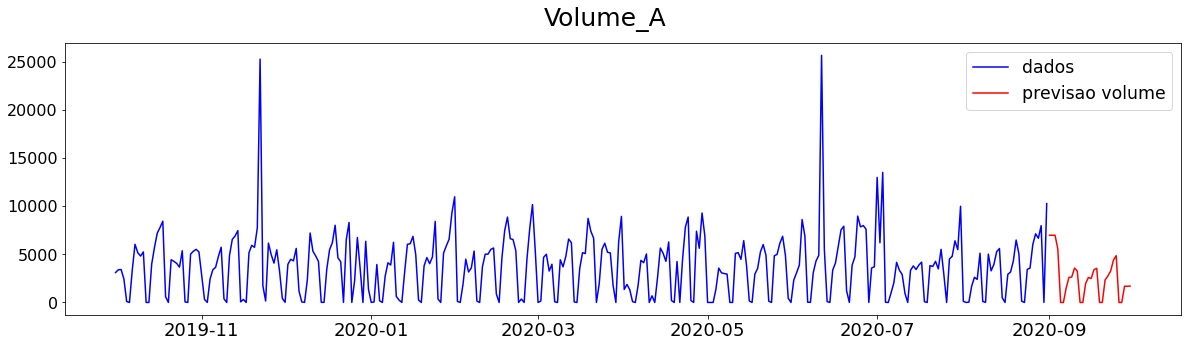

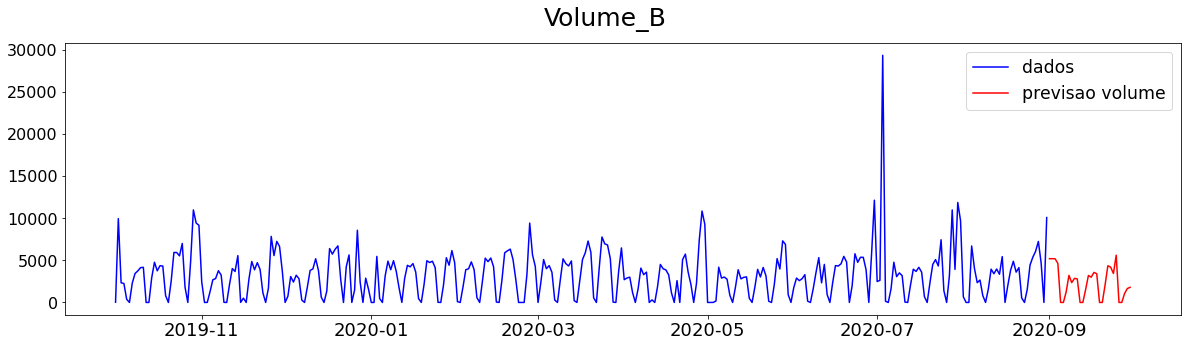

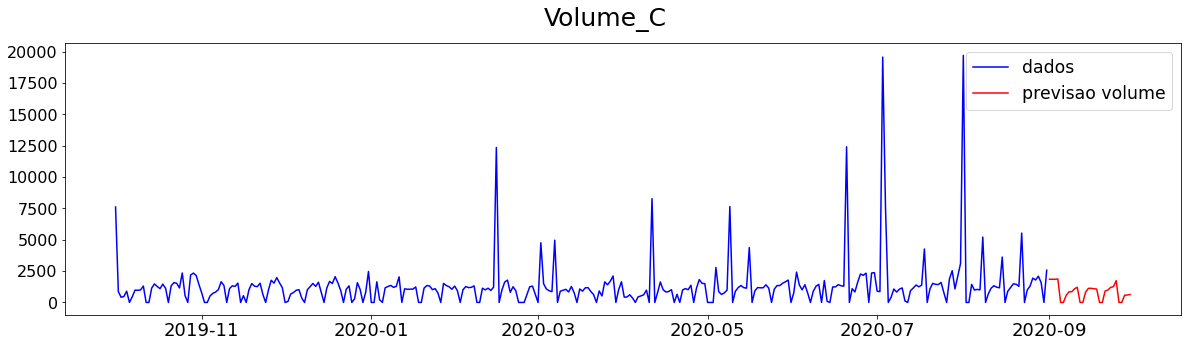

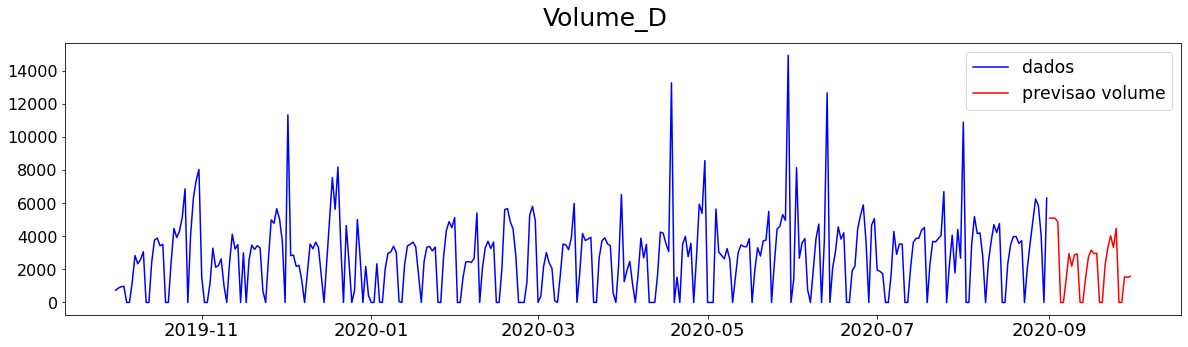

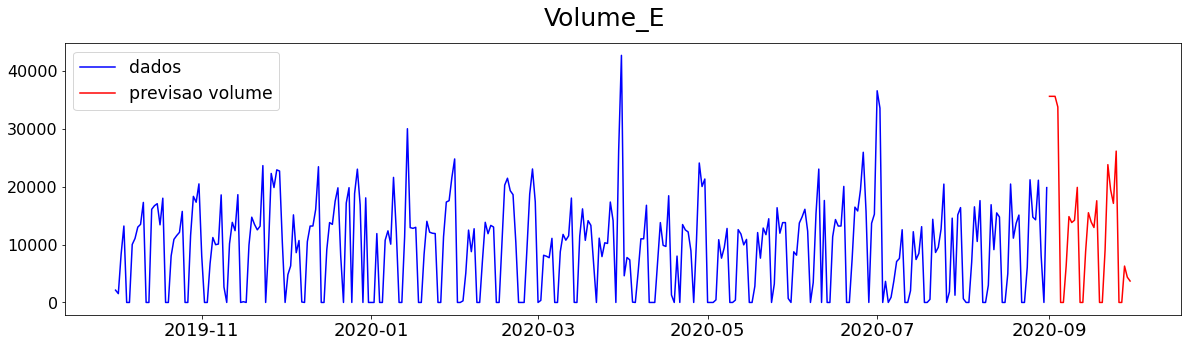

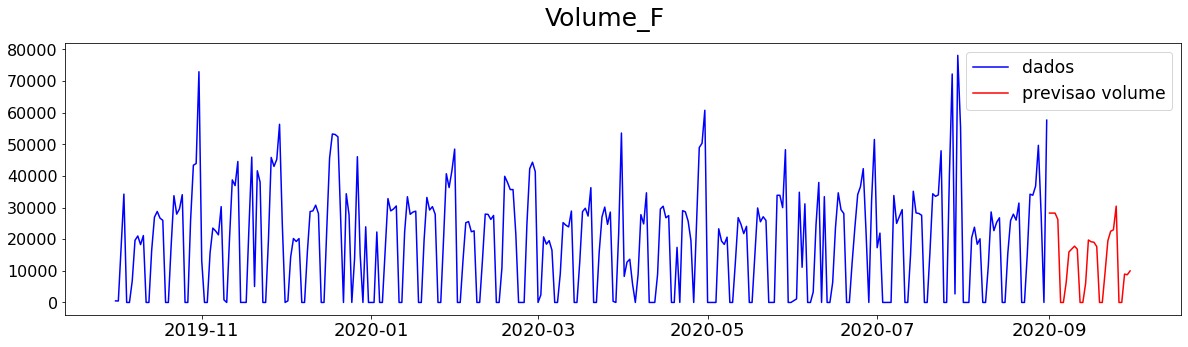

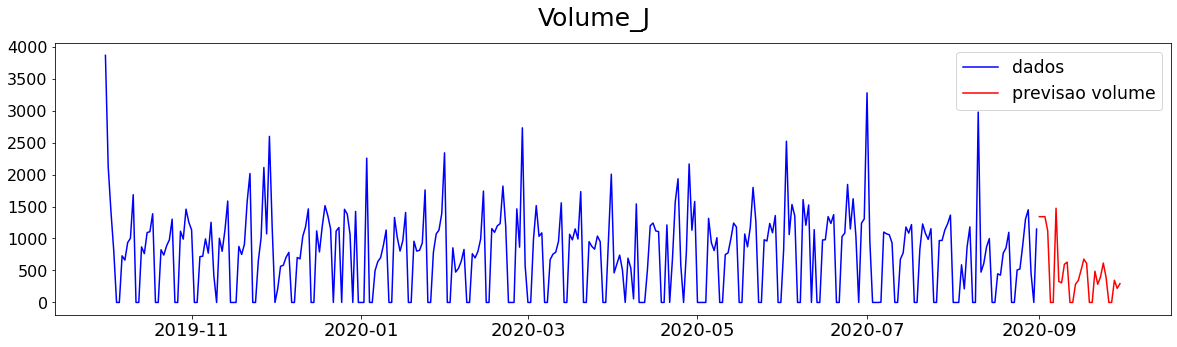

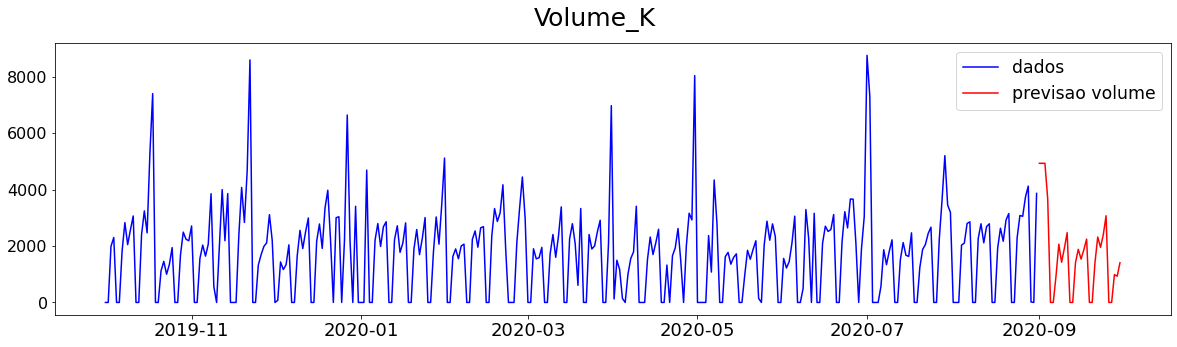

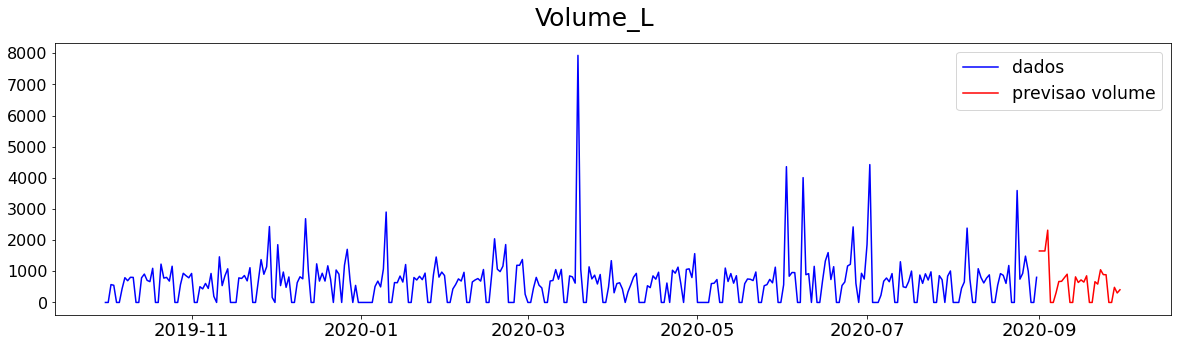

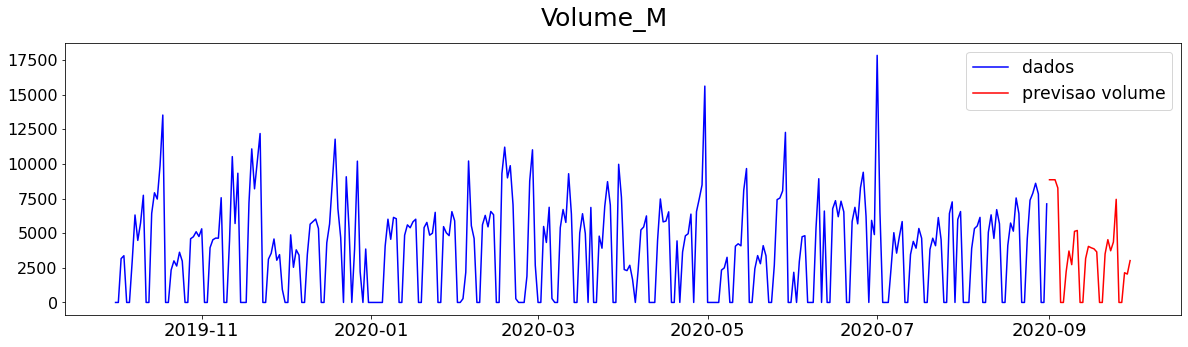

In [67]:
#plotando os volumes para todos os clusters
for dependent_variable in ['Volume_A', 'Volume_B', 'Volume_C', 'Volume_D', 'Volume_E', 'Volume_F', 'Volume_J', 'Volume_K', 'Volume_L',  'Volume_M']:
    plott(dependent_variable)

In [68]:
#exportar o dataframe
df2.to_csv('dados_volume_setembro2020.csv')